In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [ ]:

MODEL_PATH = '../models/cnn_model.h5'
VAL_DIR = '../data/processed/val'
CLASS_NAMES = ['Covid', 'Normal', 'Pneumonia', 'Tuberculosis']
IMG_SIZE = (224, 224)


In [3]:

# Load trained model
model = load_model(MODEL_PATH)


In [4]:

# Set up plot
plt.figure(figsize=(12, 8))


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

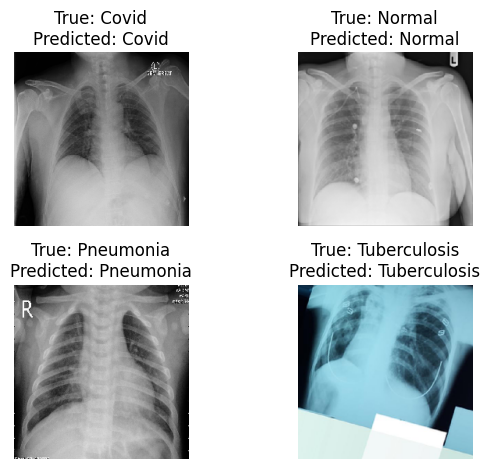

In [6]:

# Iterate through each class
for i, class_name in enumerate(CLASS_NAMES):
    class_dir = os.path.join(VAL_DIR, class_name)
    sample_image = random.choice(os.listdir(class_dir))
    img_path = os.path.join(class_dir, sample_image)

    # Load and preprocess image
    img = load_img(img_path, target_size=IMG_SIZE)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    preds = model.predict(img_array, verbose=0)
    pred_class = CLASS_NAMES[np.argmax(preds)]

    # Show image and prediction
    plt.subplot(2, 2, i + 1)
    plt.imshow(img)
    plt.title(f"True: {class_name}\nPredicted: {pred_class}")
    plt.axis('off')

plt.tight_layout()
plt.show()
